In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt

# DATA UNDERSTANDING / DISCOVERING

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.info()

# missing some data: waterfront, yr_renovated, view

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df_raw = pd.read_csv('data/kc_house_data.csv')

# Dealing with missing values

In [6]:
df.isna().sum()

# not missing a lot - maybe 
# if dropna, will only be 15000 left, so maybe don't drop..

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### waterfront

In [7]:
df.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [8]:
df.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [9]:
# replace nan with unknown
# if the house has a waterfront, it must point out YES
# so if nan, more possible it will be NO waterfront

df.waterfront = df.waterfront.fillna('NO')

In [10]:
# confirm replaced
df.waterfront.value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [11]:
df.waterfront = df.waterfront.replace(['YES','NO'],[1,0])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### view

In [13]:
df.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [14]:
# fill nan with NONE
# reason same with waterfront
# it will mention view if it has one
# otherwise, more possible NONE

df.view = df.view.fillna('NONE')

In [15]:
# confirm
df.view.isna().sum()

0

In [16]:
df.view = df.view.astype('category')

In [17]:
df.view = df.view.cat.reorder_categories(['NONE','FAIR','AVERAGE','GOOD','EXCELLENT'])

In [18]:
df.view = df.view.cat.codes

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int8   
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### yr_renovated

In [20]:
df.yr_renovated.value_counts()

# most 0.0
# a house will be renovated for:
# add value - sell/improvement

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [21]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [22]:
len(df.yr_renovated.unique())

71

In [23]:
# house revonation record should be kept
# if nan, more likely its a 0.0
# 0.0 should mean 'never'

In [24]:
# replace nan with 0.0

df.yr_renovated = df.yr_renovated.fillna(0.0)

In [25]:
# confirm
df.yr_renovated.isna().sum()

0

# FORMATTING THE DATA

In [26]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [27]:
df[df.price == df.price.max()]

# most expensive house
# 1137 Harvard Ave E
# built in 1910, renovated in 1987

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13 Mansion,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800


In [28]:
# check out top 5 expensive houses
df.sort_values('price',ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13 Mansion,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11 Excellent,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13 Mansion,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13 Mansion,6200,3000.0,2001,0.0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12 Luxury,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750


### bedrooms

In [29]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [30]:
df.bedrooms = df.bedrooms.replace(33,3)

In [31]:
# confirmed 33 is been replaced
df[df.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


### bathrooms

In [32]:
df.bathrooms.value_counts() # could be grouped more

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

### sqft_living

In [33]:
df.sqft_living.value_counts() # good for now

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

### sqft_lot

In [34]:
df.sqft_lot.value_counts()

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

In [35]:
df.sort_values('sqft_lot')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15729,9828702895,10/22/2014,700000.0,4,1.75,2420,520,1.5,0,0,...,7 Average,2420,0.0,1900,0.0,98112,47.6209,-122.302,1200,1170
5821,1773101159,1/7/2015,250000.0,3,2.25,1050,572,2.0,0,0,...,7 Average,740,310.0,2006,0.0,98106,47.5549,-122.363,1260,1062
7582,6371000026,1/22/2015,367500.0,2,2.00,1030,600,2.0,0,0,...,8 Good,680,350.0,2004,0.0,98116,47.5788,-122.410,1120,1267
3449,2559950110,4/22/2015,1230000.0,2,2.50,2470,609,3.0,0,0,...,11 Excellent,1910,560.0,2011,0.0,98112,47.6182,-122.312,2440,1229
20588,7899800857,12/15/2014,256950.0,2,2.00,1070,635,2.0,0,0,...,9 Better,720,350.0,2008,0.0,98106,47.5212,-122.357,1070,928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,722069232,9/5/2014,998000.0,4,3.25,3770,982998,2.0,0,0,...,10 Very Good,3770,0.0,1992,0.0,98058,47.4140,-122.087,2290,37141
7762,2323089009,1/19/2015,855000.0,4,3.50,4030,1024068,2.0,0,0,...,10 Very Good,4030,0.0,2006,0.0,98045,47.4619,-121.744,1830,11700
7640,2623069031,5/21/2014,542500.0,5,3.25,3010,1074218,1.5,0,0,...,8 Good,2010,1000.0,1931,0.0,98027,47.4564,-122.004,2450,68825
17305,3326079016,5/4/2015,190000.0,2,1.00,710,1164794,1.0,0,0,...,5 Fair,710,0.0,1915,0.0,98014,47.6888,-121.909,1680,16730


<AxesSubplot:>

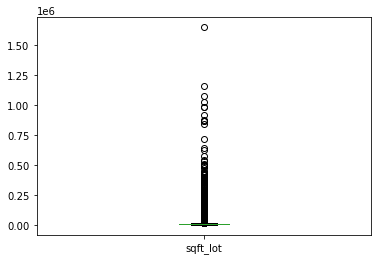

In [36]:
df.sqft_lot.plot(kind='box') # quite a few outliers

### condition

In [37]:
df.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [38]:
df.condition = df.condition.astype('category')

In [39]:
df.condition = df.condition.cat.reorder_categories(['Poor','Fair','Average','Good','Very Good'])
df.condition

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: category
Categories (5, object): ['Poor', 'Fair', 'Average', 'Good', 'Very Good']

In [40]:
df.condition = df.condition.cat.codes

In [42]:
df.condition

0        2
1        2
2        2
3        4
4        2
        ..
21592    2
21593    2
21594    2
21595    2
21596    2
Name: condition, Length: 21597, dtype: int8

# sqft_basement

In [43]:
# it has ?
# replace those with 0.0
# since it has basement, assume the seller will state it out

df.sqft_basement = df.sqft_basement.replace('?','0.0')

In [44]:
# check if all ends with 0
# then turn it to int/float
df.sqft_basement.str.endswith('0').sum()

21597

In [45]:
df.sqft_basement = df.sqft_basement.map(lambda x: str(x)[:-2])

In [46]:
df.sqft_basement = df.sqft_basement.astype(int)

In [47]:
df.sqft_basement

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int32

### date

In [48]:
df["date"]= pd.to_datetime(df["date"]) # house was sold

In [49]:
df.sort_values('date') 
# data for 2014.5.2 ~ 2015.5.27
# may not be useful?

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7316,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,0,0,...,7 Average,1450,0,1954,0.0,98006,47.5746,-122.135,1260,8942
20586,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,...,8 Good,3310,0,2012,0.0,98065,47.5150,-121.870,2380,5000
1040,7197300105,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,...,7 Average,1140,800,1976,0.0,98052,47.6830,-122.114,2200,10500
20543,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0,0,...,7 Average,1280,350,2009,0.0,98106,47.5489,-122.363,1590,2306
9587,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,...,9 Better,1700,900,1951,0.0,98117,47.6833,-122.400,2380,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,8149600265,2015-05-14,725000.0,4,1.75,1980,5850,1.0,0,1,...,8 Good,1380,600,1960,0.0,98116,47.5607,-122.391,1810,5850
12623,4166600610,2015-05-14,335000.0,3,2.00,1410,44866,1.0,0,0,...,7 Average,1410,0,1985,0.0,98023,47.3273,-122.370,2950,29152
5632,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,...,7 Average,1870,0,1960,0.0,98007,47.5951,-122.144,1870,7650
13040,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,...,6 Low Average,720,670,1941,0.0,98115,47.6914,-122.308,920,6380


### grade

keep only number

In [50]:
df.grade = df.grade.map(lambda x: x.split()[0])

In [51]:
df.grade = df.grade.astype(int)

In [52]:
df.grade.value_counts(sort=False)

3        1
4       27
5      242
6     2038
7     8974
8     6065
9     2615
10    1134
11     399
12      89
13      13
Name: grade, dtype: int64

In [53]:
# some groups can be merged
# need to kill the outliers

### floors

In [54]:
df.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

### zipcode

In [55]:
df.zipcode.value_counts()
# could be use to count the density

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

### yr_built

In [56]:
df.yr_built.value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

<AxesSubplot:xlabel='yr_built', ylabel='price'>

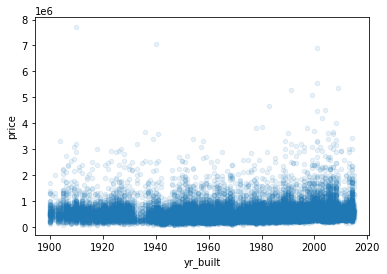

In [57]:
df.plot(x='yr_built',y='price',kind='scatter',alpha=0.1)
# old house sell more?

### yr_renovated

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

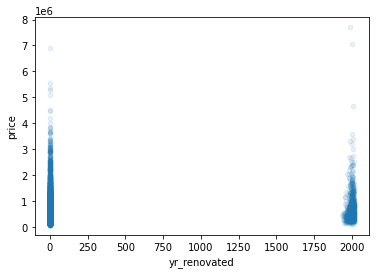

In [58]:
df.plot(x='yr_renovated',y='price',kind='scatter',alpha=0.1)
# may not enough data to prove

# FINAL DROP

In [59]:
df = df.drop(columns=['id','date'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int8   
 8   condition      21597 non-null  int8   
 9   grade          21597 non-null  int32  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int32  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

# done cleaning! and SAVE TO CSV and CALL IT A DAY!

In [61]:
import pickle
df.to_pickle('data_Han/Han_df_cleaned')

In [64]:
df.to_csv(r'C:\Users\qwswe\Documents\Flatiron\DS_P2_King-County-House-Sales-Predict\kc_house_data_cleaned.csv', index = False)